In [4]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.optimizers import Adam

In [5]:
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/sahad/Documents/Python/archive/train',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/sahad/Documents/Python/archive/validation',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse')


train_generator.class_indices

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 20, verbose= 1, mode='auto')

mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [es, mc]

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=call_back)

Epoch 1/50
901/901 [==============================] - ETA: 0s - loss: 2.1741 - accuracy: 0.3355
Epoch 1: val_accuracy improved from -inf to 0.42712, saving model to best_model.keras
901/901 [==============================] - 105s 108ms/step - loss: 2.1741 - accuracy: 0.3355 - val_loss: 1.5850 - val_accuracy: 0.4271
Epoch 2/50
899/901 [============================>.] - ETA: 0s - loss: 1.5413 - accuracy: 0.4389
Epoch 2: val_accuracy did not improve from 0.42712
901/901 [==============================] - 18s 20ms/step - loss: 1.5412 - accuracy: 0.4389 - val_loss: 1.6523 - val_accuracy: 0.3967
Epoch 3/50
901/901 [==============================] - ETA: 0s - loss: 1.4701 - accuracy: 0.4686
Epoch 3: val_accuracy improved from 0.42712 to 0.50212, saving model to best_model.keras
901/901 [==============================] - 20s 22ms/step - loss: 1.4701 - accuracy: 0.4686 - val_loss: 1.3758 - val_accuracy: 0.5021
Epoch 4/50
901/901 [==============================] - ETA: 0s - loss: 1.4299 - accura

In [33]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/kaggle/working/best_model.keras")


In [34]:
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

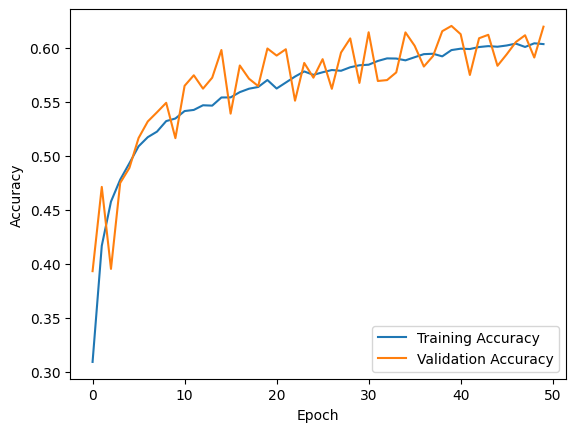

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

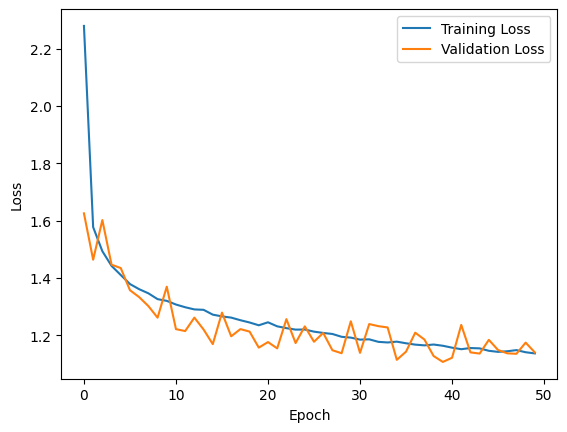

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
op = dict(zip( train_generator.class_indices.values(), train_generator.class_indices.keys()))

1/1 [==============================] - 0s 18ms/step


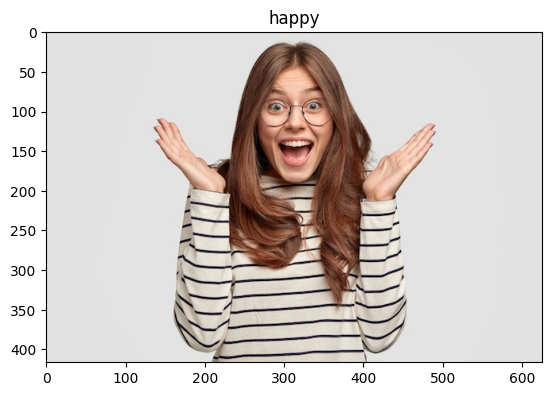

In [44]:
# Load and preprocess an image for prediction
img_path = '/kaggle/input/test-purpose/Happy2.jpg'
original_img = image.load_img(img_path)

img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0



predictions = model.predict(img_array)


predicted_class = np.argmax(predictions)



plt.title(f'{op[predicted_class]}')
plt.imshow(original_img)